In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Load datasets
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")

In [3]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [4]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [17]:
# Merge datasets
merged_data = transactions.merge(products, on="ProductID", how="left")
merged_data = merged_data.merge(customers, on="CustomerID", how="left")


In [18]:
merged_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')

In [19]:
merged_data.shape

(1000, 13)

In [48]:
len(merged_data['ProductName'].unique())

66

In [20]:
merged_data.head

<bound method NDFrame.head of     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   3

In [21]:
# Convert date columns to datetime
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["SignupDate"] = pd.to_datetime(merged_data["SignupDate"])


In [23]:
#checking correlation
merged_data.corr(numeric_only=True)

,Quantity,TotalValue,Price_x,Price_y
Quantity,1.000000,0.609972,-0.009378,-0.009378
TotalValue,0.609972,1.000000,0.722714,0.722714
Price_x,-0.009378,0.722714,1.000000,1.000000
Price_y,-0.009378,0.722714,1.000000,1.000000


In [24]:
# Drop redundant columns
merged_data = merged_data.drop(columns=["Price_x"])
merged_data.rename(columns={"Price_y": "Price"}, inplace=True)
# price_x and price_y have high correlation  so we can drop one of them 

In [25]:
merged_data["TransactionMonth"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_sales = merged_data.groupby("TransactionMonth")["TotalValue"].sum().reset_index()

In [26]:
print(monthly_sales.columns)


Index(['TransactionMonth', 'TotalValue'], dtype='object')


In [31]:
monthly_sales

,TransactionMonth,TotalValue
0,2023-12,3769.52
1,2024-01,66376.39
2,2024-02,51459.27
3,2024-03,47828.73
4,2024-04,57519.06
5,2024-05,64527.74
6,2024-06,48771.18
7,2024-07,71366.39
8,2024-08,63436.74
9,2024-09,70603.75


In [28]:
# Check for missing or invalid dates
print(merged_data["TransactionDate"].isna().sum())  # Count missing values


0


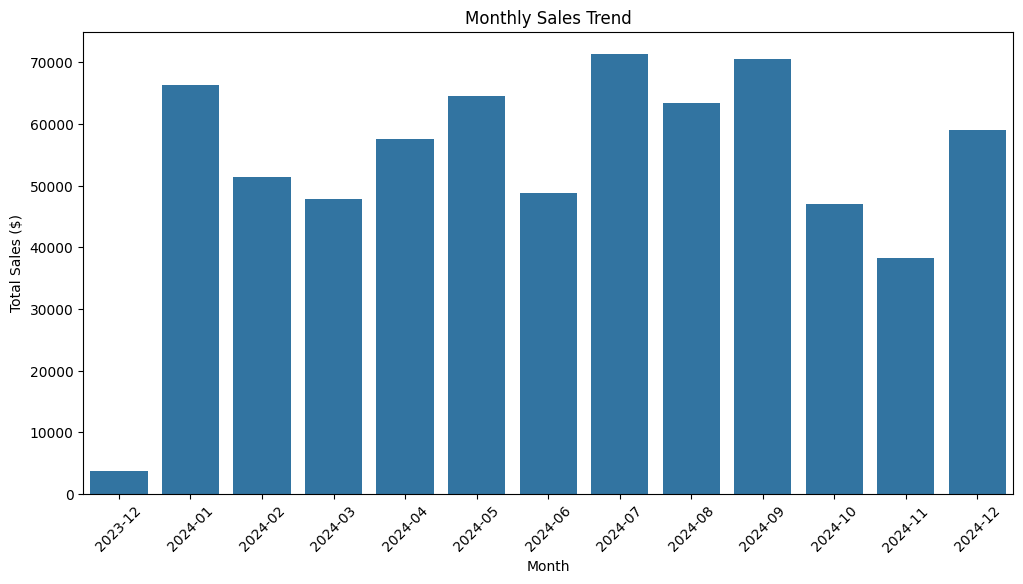

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(monthly_sales, x="TransactionMonth", y="TotalValue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

# First Insight
### DECEMBER OF 2023 HAD THE LOWEST SALES OF ALL TIME WHILE JULY OF 2024 WAS THE BEST MONTH FOR SALES
### OVERALL THE SALES TREND HAS BEEN IMPROVED AFTER THE DECEMBER OF 2023
### Looking up at signup dates which date back to 2022 , the actual orders started coming in 2023 of december, therefore one can also say that this month was the beginning of ecommerce business described in problem.

In [39]:
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

In [40]:
category_sales.head



<bound method NDFrame.head of Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64>

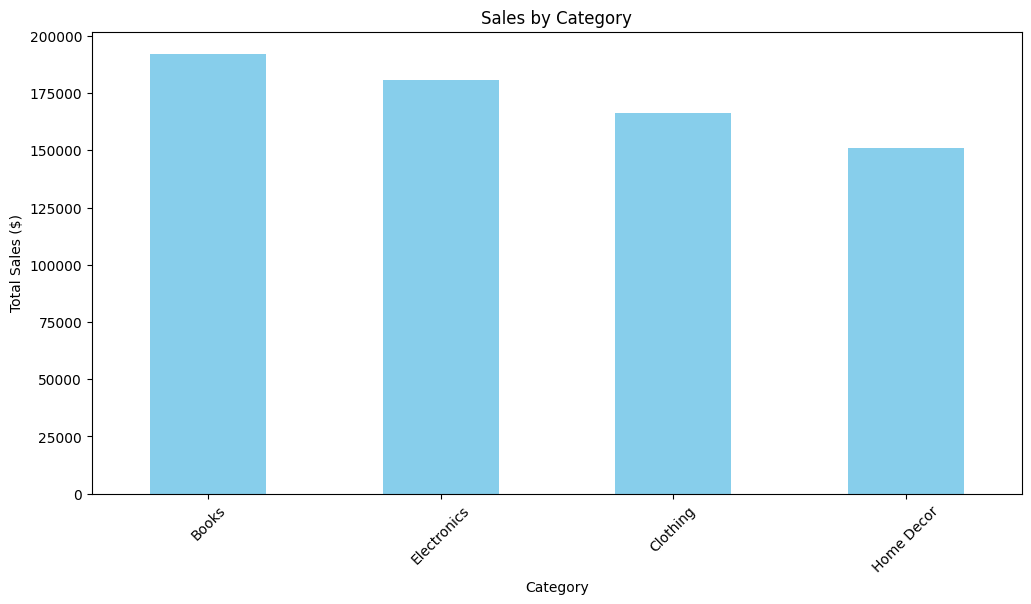

In [41]:
plt.figure(figsize=(12, 6))
category_sales.plot(kind="bar", color="skyblue")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

# Second Insight 
### Books have been the major contributor to overall sales done 
### Home Decor has been the lowest contributor to the overall sales

In [51]:
product_sales = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)

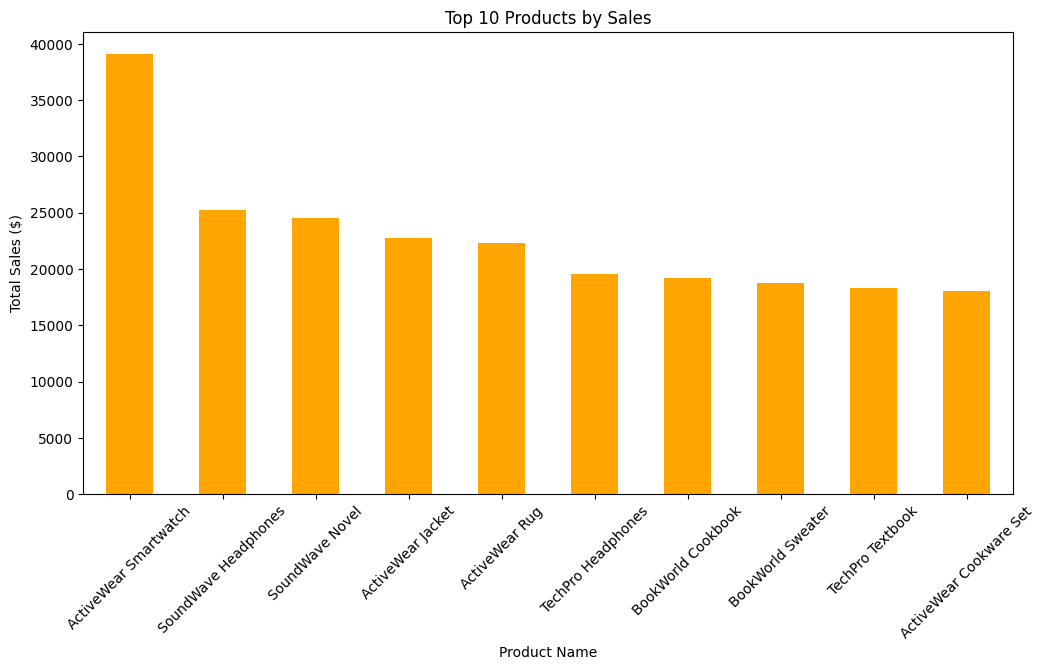

In [52]:
plt.figure(figsize=(12, 6))
product_sales.plot(kind="bar", color="orange")
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

In [53]:
least_10_product_sales = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).tail(10)

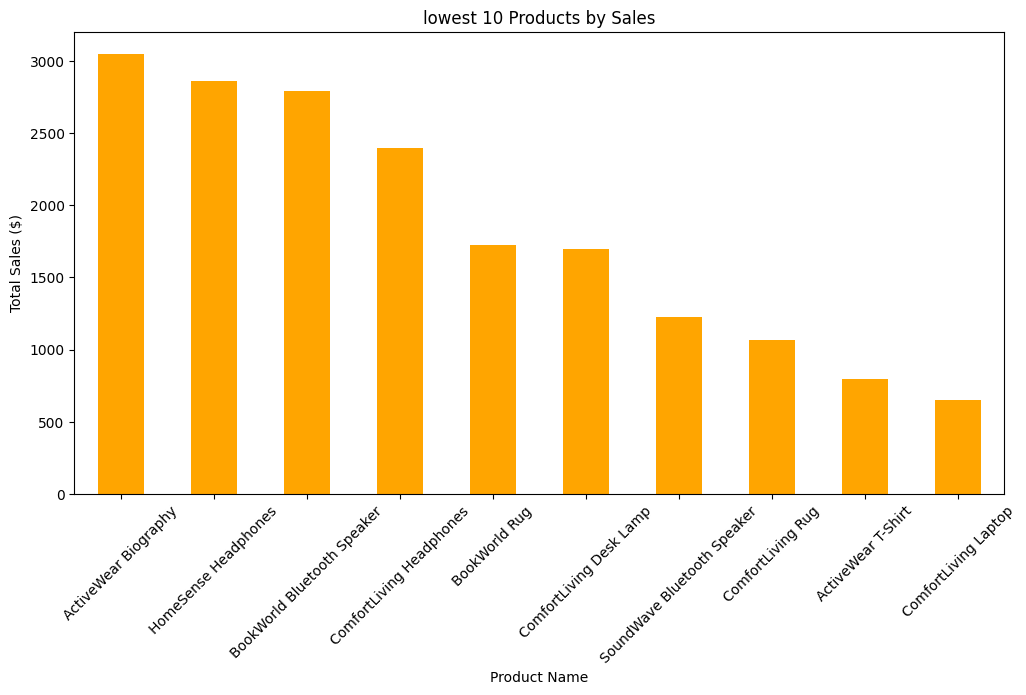

In [54]:
plt.figure(figsize=(12, 6))
least_10_product_sales.plot(kind="bar", color="orange")
plt.title("lowest 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

# Third Insight 
### By seeing the top 10 products as well as bottom 10 products according to their sales we clearly get to know that it's the products under Electronics that generate the highest ("Activewear Smartwatch") as well as the lowest revenue("ComfortLiving Laptop")
### We can see from previous insight that books had the highest overall sales which shows that even though products under the books category had lesser sales then the products under the Electronics category they overall altogether sold well then Electronics 

In [56]:
regional_sales = merged_data.groupby("Region")["TotalValue"].sum()

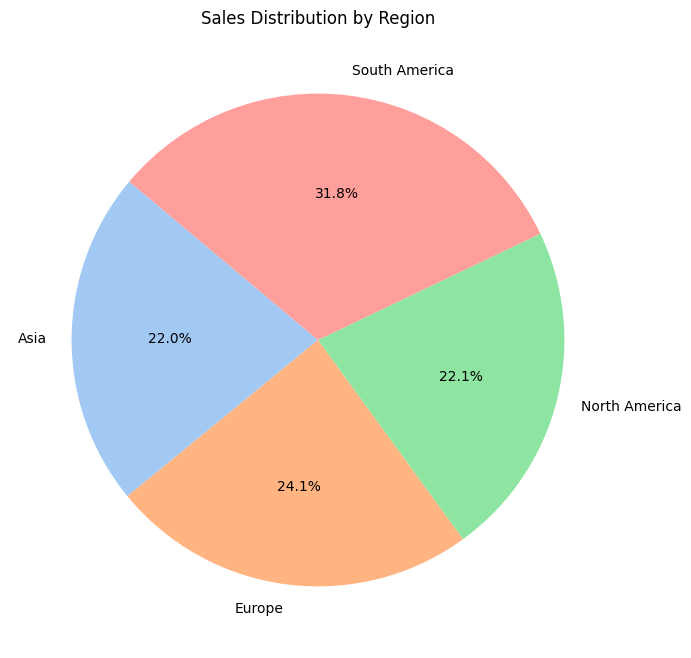

In [57]:
plt.figure(figsize=(8, 8))
regional_sales.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()

# Fourth Insight
## Here we can see that Asia , Europe and North America had similar of sales, sales were highest in South America

In [58]:
merged_data["SignupYear"] = merged_data["SignupDate"].dt.year
signup_trends = merged_data.groupby("SignupYear")["CustomerID"].nunique()

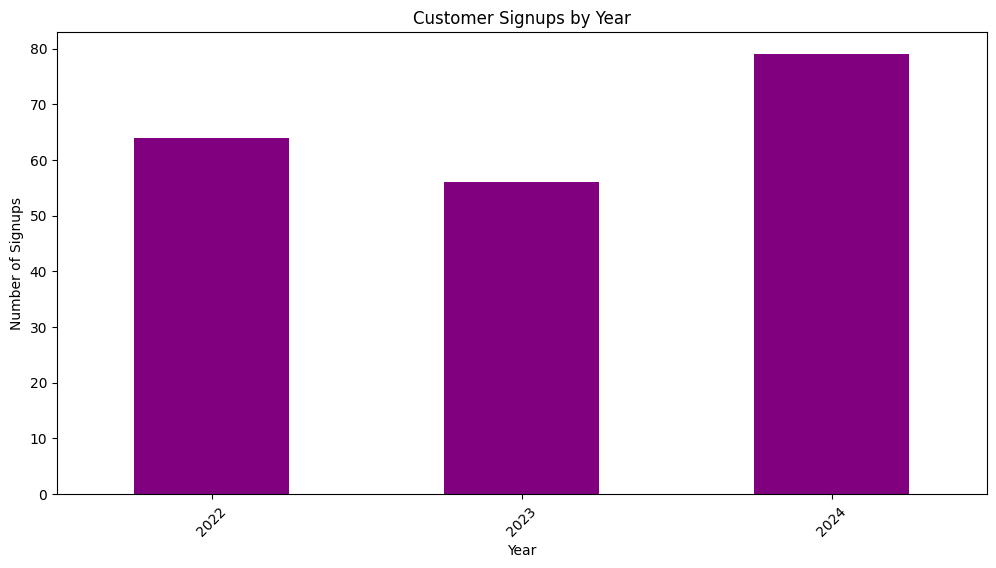

In [59]:
plt.figure(figsize=(12, 6))
signup_trends.plot(kind="bar", color="purple")
plt.title("Customer Signups by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

# Fifth Insight 
## The year 2022 was the year when the ecommerce business described here started signinig up
## The year 2023 also went into signing up customers and from december of 2023 the business started doing sales
### The year 2024 had a lot of signups considering that this jump in signups came after the ecommerce business started it can be stated that the sales generated more signups thus this could be seen as an positive development as this increase in signups can be natural.